In [1]:
import sys

sys.path.append("../src")

In [10]:
# from exp_smoothing import ExpSmoothing
import exponential_smoothing
from importlib import reload
reload(exponential_smoothing)

obj = exponential_smoothing.ExpSmoothing()

In [11]:
repo = "p971074907"
country = "brl"
subregion1 = "rn"
path = country+':'+subregion1
feature = "date:newDeaths"
mavg_window_size = "7"
begin = "2020-01-01"
end = "2050-01-01"

data = obj.get_data(repo, path, feature, mavg_window_size, begin, end)

In [12]:
data_test_size_in_days = 7*10
input_window_size = 7
scores = obj.grid_search_exp(data_test_size_in_days,input_window_size)

> Model[[None, False, None, None, False, False]] 1.648
done model exp
3 best models are: 
[None, False, None, None, False, False] 1.648481941475326



In [13]:
obj.retrain_best_models()

In [15]:
obj.model_save()

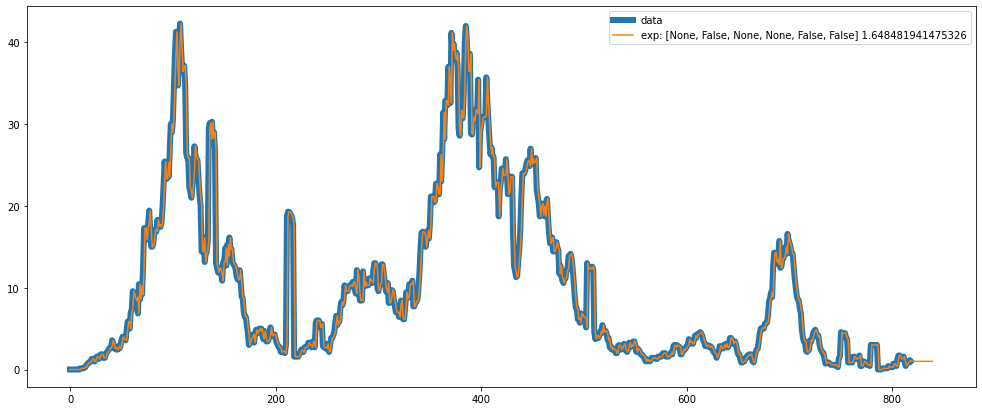

In [6]:
yhat = obj.instance_forecast_ahead(20)

import matplotlib.pyplot as plt
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

plt.figure(figsize=(17,7))
plt.plot(obj.data_used_in_trainning, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

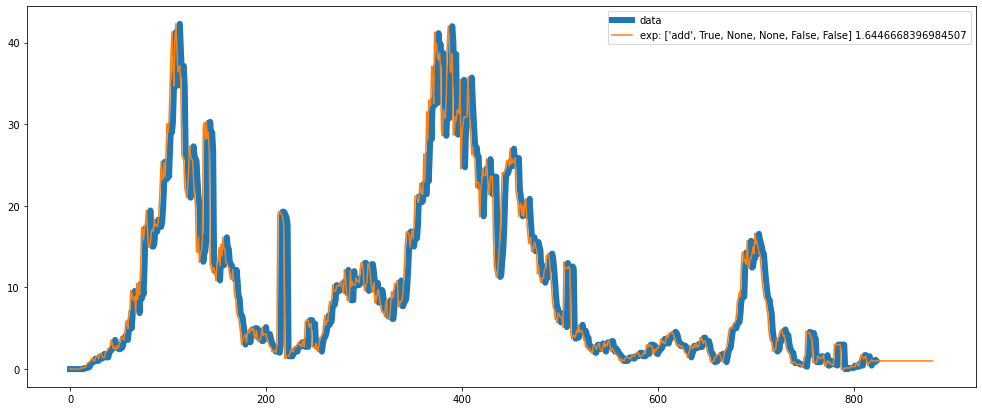

In [84]:
begin_forecast = "2020-04-01"
end_forecast = "2022-08-10"
yhat = obj.instance_forecast_by_period(str(obj.begin_raw.date()), end_forecast)

import matplotlib.pyplot as plt
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

plt.figure(figsize=(17,7))
plt.plot(obj.data, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

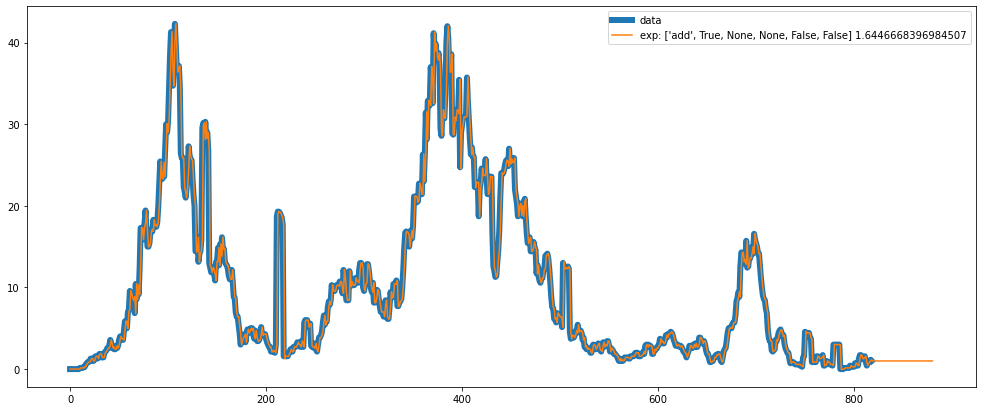

In [85]:
import matplotlib.pyplot as plt
from numpy import array
name = obj.model_instances[0][0]
cfg = obj.model_instances[0][3]
error = obj.model_instances[0][4]

# convert windows of weekly multivariate data into a series of total power
def to_series(data):
  # extract just the total power from each week
  series = [week[:] for week in data]
  # flatten into a single series
  series = array(series).flatten()
  return series

plt.figure(figsize=(17,7))
plt.plot(obj.data_used_in_trainning, label='data', linewidth=6)
plt.plot(yhat, label=name+": "+cfg+" "+str(error))
plt.legend()

In [13]:
model_inst = obj.model_instances[0][2]
print(obj.model_instances)

[('exp', <function exp_smoothing_forecast at 0x7f93d76d0560>, <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper object at 0x7f93d8135350>, "['add', True, None, None, False, False]", 1.6446668396984507), ('exp', <function exp_smoothing_forecast at 0x7f93d76d0560>, <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper object at 0x7f93d765fa10>, "['add', True, None, None, False, True]", 1.6456135855406253), ('exp', <function exp_smoothing_forecast at 0x7f93d76d0560>, <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper object at 0x7f93d762a7d0>, '[None, False, None, None, False, False]', 1.648481941475326)]


In [12]:
model_inst.save("../dbs/model_instances/tst.pkl")

In [71]:
import uuid, json

instance_region = "brl:rn"
save_instance_path = "../dbs/model_instances/"
save_metadata_path = "../dbs/instances_metadata/"

def model_save(model_instances_scores):
        for name, func, instance, cfg, score in model_instances_scores:
            filename = str(uuid.uuid1())
            instance.save(save_instance_path+filename+".pkl")
            save_metadata(filename, cfg, score)

def save_metadata(filename, cfg, score):
    metadata = {}
    metadata['instance_id'] = filename
    metadata['cfg'] = cfg
    metadata['score'] = score
    metadata['region'] = instance_region
    metadata['data_training_begin'] = obj.begin_training
    metadata['data_training_end'] = obj.ending_raw
    with open(
        save_metadata_path + "metadata_" + cfg + "_" + instance_region + ".json", "w"
    ) as json_to_save:
        json.dump(metadata, json_to_save, indent=4)
    return json
    

TypeError: Object of type datetime is not JSON serializable